# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset Information**：
>
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> 
> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe `(|)` characters.
> There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
> 
> **Example Questions**: 
> - Which genres are most popular from year to year? 
> - What kinds of properties are associated with movies that have high revenues?
>
> **Purpose**:
> 
> In this notebook, I will focus on EDA with the dataset by exploring the correlation between revenue and other metrics. We know that the popularity of a movie depends on various factors such as the genre, the cast, and the director of the film. Considering all these factors, I will analyze the dataset to extract the most important metrics that are associated with movies that have high revenue.

**Import the packages**:
In this dataset, I will import pandas, numpy to do the EDA, and import matplotlib, seaborn, wordcloud, and collections to visualize the data.

In [81]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns #visualization tool
from wordcloud import WordCloud
import collections
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the TMDb dataset for analysis.

### General Properties

In [82]:
# Load the data and find out the datatypes and which column is null.
df = pd.read_csv('tmdb-movies.csv')
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above information indicates that the dataset has 10866 rows and that there are 6 columns, i.e., `imdb_id`, `cast`, `homepage`, `tagline`, `keywords`, `production_companies`, with null values.

In [83]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [84]:
# check the size of dataset.
df.shape

(10866, 21)

I will drop four columns, i.e., `homepage`, `tagline`, `keyword`, and `overview`, since these columns are general description about movies and are not related to my EDA.

### Data Cleaning
#### Step 1: Drop columns that are not related to my analysis.
Drop four columns: `homepage`, `tagline`, `keywords`, and `overview`.

In [85]:
# Drop columns
df.drop(['homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [86]:
# confirm changes
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Step 2: Check nulls and drop rows that are null.

In [87]:
# View missing counts for each feature in the data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The above information indicates that five columns have rows that are null. I will drop these rows to obtain the clean dataset.

In [88]:
# Drop the column `imdb_id` since we already have id.
df.drop(['imdb_id'], axis=1, inplace=True)
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [89]:
# Drop the rows where the column `genres` has null cells, since genres is a key metric that we need to explore.
df.dropna(subset=['genres', 'cast', 'director', 'production_companies'], inplace=True)
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [90]:
df.shape # finally, the not null dataset has 9773 rows and 16 columns.

(9773, 16)

#### Step 3: Check and drop the duplicated data.

In [91]:
# check the duplicated row.
df.duplicated().sum()

1

In [92]:
# drop the duplicated row.
df.drop_duplicates(inplace=True)

In [93]:
# check the number of rows.
df.shape

(9772, 16)

Finally, the dataset is cleaned and I will save it as a new csv file `imbd_clean.csv`.

In [94]:
# save to a new csv file
df.to_csv('imdb_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which <font color='red'>genres</font> are most popular from year to year? 

#### Step 1: Find out the genres with the highest frequency from year to year.

In [95]:
# count the genre frequency over years.
list1 = [] # list of genre for each movie
for i in df.genres:
    temp_genre = i.split('|')
    for j in temp_genre:
        list1.append(j)

In [96]:
# count the frequency of each genre:
counter = collections.Counter(list1)

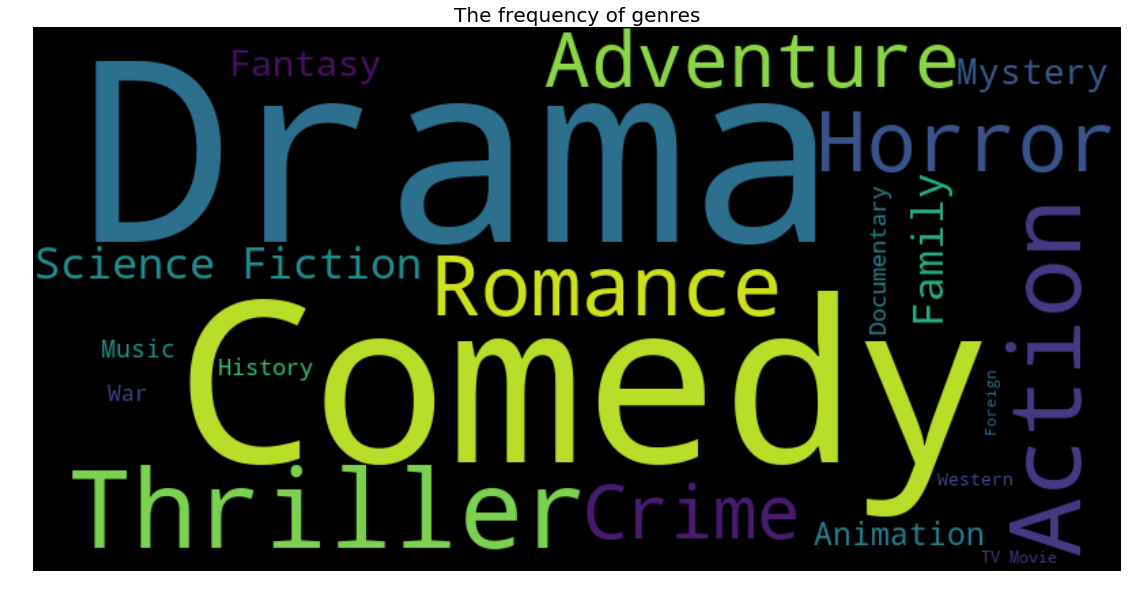

In [97]:
# visualize the most popular genres.
wordcloud = WordCloud(width=800, height=400)

wordcloud.generate_from_frequencies(frequencies=counter)
plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The frequency of genres', fontsize=20)
plt.show()

This chart shows that `Drama`, `Thriller`, and `Comeday` are three genres with high frequency.

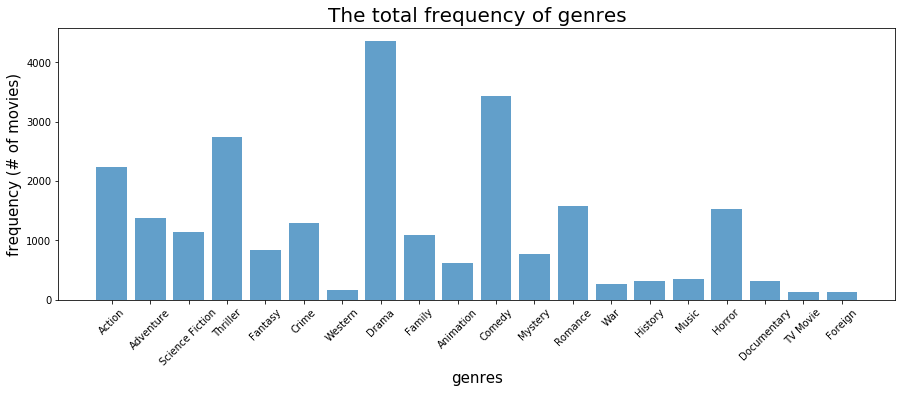

In [98]:
# Show the results in bar chat
plt.subplots(figsize=(15, 5))
x_pos = [i for i in counter.keys()]
y_pos = [i for i in counter.values()]
plt.bar(x_pos, y_pos, alpha=.7)
plt.xticks(rotation=45)
plt.title('The total frequency of genres', fontsize=20)
plt.xlabel('genres', fontsize=15)
plt.ylabel('frequency (# of movies)', fontsize=15);

#### Step 2: Find the correlation between movie's popularity and genres.

In [135]:
# load the df_clean
df_clean = pd.read_csv('imdb_clean.csv')

In [136]:
# create a dictionary to save all popularity corresponding to each genres.
genres_dic_popularity = {}

for i in df_clean.genres:
    for gen in i.split('|'):
        genres_dic_popularity[gen] = []

In [137]:
for i in df_clean.index:
    for gen in df_clean['genres'].loc[i].split('|'):
        genres_dic_popularity[gen].append(df_clean['popularity'].loc[i])

for i in genres_dic_popularity.keys():
    genres_dic_popularity[i] = round(sum(genres_dic_popularity[i]),0)

In [138]:
# visualize the popularity and vote_average vs. genres
x_pos = [i for i in genres_dic_popularity.keys()]
y_pos = [i for i in genres_dic_popularity.values()]

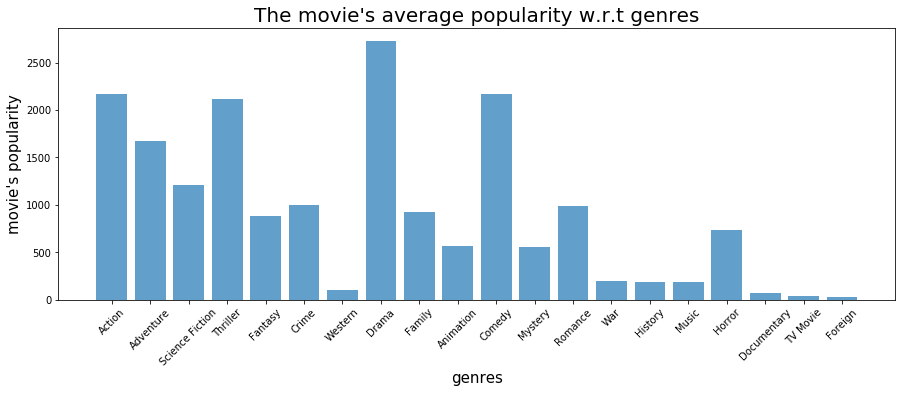

In [139]:
# Show the results in bar chat
plt.subplots(figsize=(15, 5))

plt.bar(x_pos, y_pos, alpha=.7)
plt.xticks(rotation=45)
plt.title("The movie's average popularity w.r.t genres", fontsize=20)
plt.xlabel('genres', fontsize=15)
plt.ylabel("movie's popularity", fontsize=15);

**Note**

The above chart shows that the genre `Drama` has the highest total popularity of movies. 

In the next step, I will continue to explore the popularity of genre from year to year. In general, I think popularity can indicate the overall quality of movies from year to year. Therefore, it makes sense to check the stability of this type of genres from year to year by checking the stability of its total popularity.

#### Step 4: Based on the above analysis, `Drama` can be identified as the most popular genre if considering the # of movies or the movie's total popularity as main factors. 
First, I will explore the popularity of Drama from year to year.

In [140]:
pop_gen_year = {}
pop_gen_year_avg = {}
pop_gen_year_sum = {}

for i in df_clean.index:
    for gen in df_clean['genres'].loc[i].split('|'):
        pop_gen_year[gen] = {}
        pop_gen_year_avg[gen] = {}
        pop_gen_year_sum[gen] = {}

for i in df_clean.index:
    for gen in df_clean['genres'].loc[i].split('|'):
        pop_gen_year[gen][df_clean['release_year'].loc[i]] = []
        pop_gen_year_avg[gen][df_clean['release_year'].loc[i]] = []
        pop_gen_year_sum[gen][df_clean['release_year'].loc[i]] = []

In [141]:
for i in df_clean.index:
    for gen in df_clean['genres'].loc[i].split('|'):
        pop_gen_year[gen][df_clean['release_year'].loc[i]].append(df_clean['popularity'].loc[i])

In [142]:
for i in pop_gen_year.keys():
    for j in pop_gen_year[i].keys():
        pop_gen_year_sum[i][j] = round(sum(pop_gen_year[i][j]),0)
        pop_gen_year_avg[i][j] = round(sum(pop_gen_year[i][j])/len(pop_gen_year[i][j]),0)

In [143]:
drama = pop_gen_year_sum['Drama']
comedy = pop_gen_year_sum['Comedy']
action = pop_gen_year_sum['Action']
adventure = pop_gen_year_sum['Adventure']
thriller = pop_gen_year_sum['Thriller']

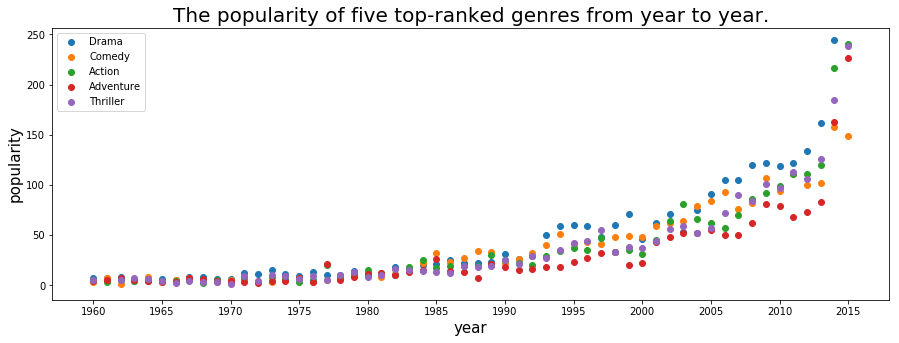

In [144]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(drama.keys(), drama.values(), label = 'Drama')
ax.scatter(comedy.keys(), comedy.values(), label = 'Comedy')
ax.scatter(action.keys(), action.values(), label = 'Action')
ax.scatter(adventure.keys(), adventure.values(), label = 'Adventure')
ax.scatter(thriller.keys(), thriller.values(), label = 'Thriller')
leg = ax.legend(loc='upper left')
plt.xticks(np.arange(min(drama.keys()), max(drama.keys())+1, 5.0))
plt.xlabel('year', fontsize=15)
plt.ylabel('popularity', fontsize=15)
plt.title('The popularity of five top-ranked genres from year to year.', fontsize=20);

Based on the above chart, I found that the popularity of `Drama` movies was significantly increased from **1995** to **2015**. The overall `Drama` movies are slightly more popular than other four types of genres from year to year.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [145]:
# calculate the profits and add the profits to the dataset
df_clean['profits'] = df_clean.revenue_adj - df_clean.budget_adj
df_clean.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


#### Step 1: We notice that the <font color='red'>popularity</font> and <font color='red'>vote_count</font> are two `quantified` factors that are highly related to revenue.

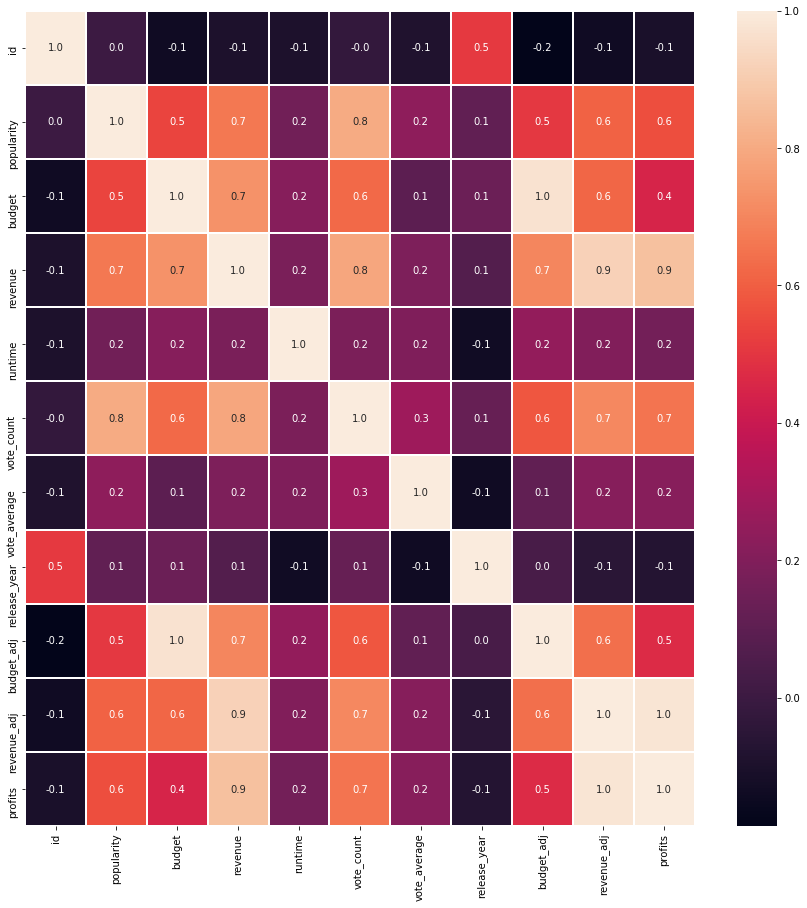

In [146]:
#correlation map
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_clean.corr(), annot=True, linewidths=1, fmt='.1f', ax=ax)
plt.show()

- The correlation factor between `popularity` and `revenue_adj` is 0.6;
- The correlation factor between `vote_average` and `revenue_adj` is 0.7.
- The correlation factor between `budget_adj` and `revenue_adj` is 0.6.

In [147]:
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,3.763710e+07
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,1.314756e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,0.000000e+00
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,2.029698e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


The descriptive statistics indicate that the **popularity** data have outliers.

In [148]:
# drop columns that are not related to revenue.
df_clean.drop(columns=['runtime', 'release_date', 'budget', 'revenue'], axis=1, inplace=True)
df_clean.head(1)

,id,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


#### Step 1.1: Analyze the correlation between vote_average and revenue (coeffect=0.7).

In [194]:
# create a dictionary of vote_average and revenue_adj.
revenue = df_clean['revenue_adj']
vote_average = df_clean['vote_average']

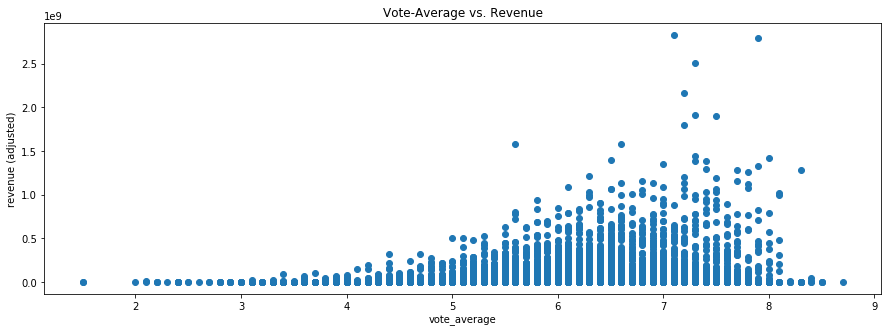

In [195]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(vote_average, revenue)
plt.xlabel('vote_average')
plt.ylabel('revenue (adjusted)')
plt.title('Vote-Average vs. Revenue');

This figure shows that the higest revenues fall into the range of vote_average between **6 and 8**.

#### Step 1.2: Analyze the correlation between popularity and revenue (coefficient = 0.6).

In [192]:
# exclude the outliers of the popularity data.
popularity = []
revenue = []

for i in df_clean.index:
    if df_clean['popularity'].loc[i] <= 1:
        revenue.append(round(df_clean['revenue_adj'].loc[i],0))
        popularity.append(round(df_clean['popularity'].loc[i],2))

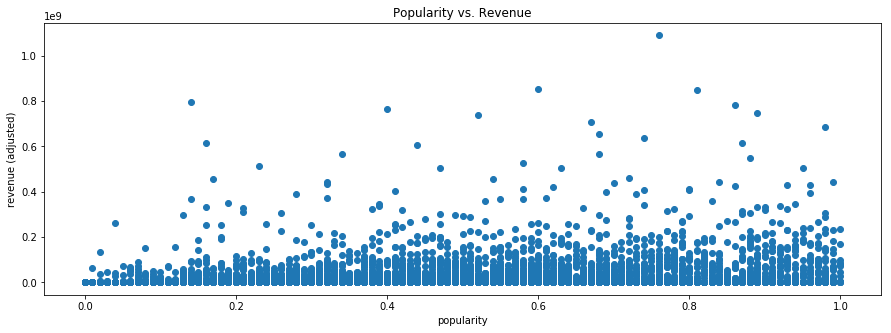

In [193]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(popularity, revenue)
plt.xlabel('popularity')
plt.ylabel('revenue (adjusted)')
plt.title('Popularity vs. Revenue');

After excluding the outliers, this figure shows that the correlation between popularity and revenue is not very clear.

#### Step 1.3: Analyze the correlation between budget and revenue (coefficient = 0.6).

In [164]:
budget = df_clean['budget_adj']
revenue = df_clean['revenue_adj']

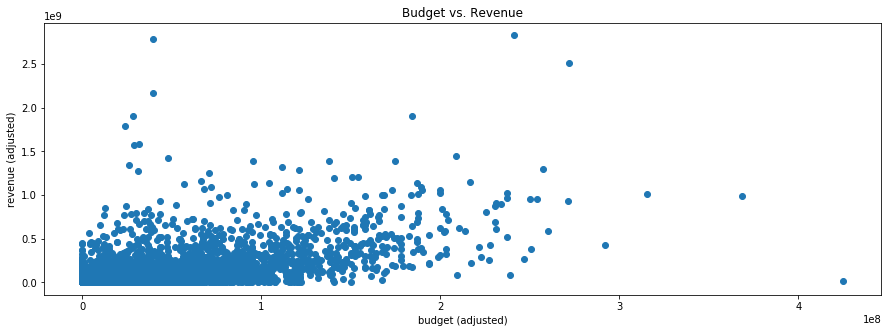

In [189]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(budget, revenue)
plt.xlabel('budget (adjusted)')
plt.ylabel('revenue (adjusted)')
plt.title('Budget vs. Revenue');

Since the data of budget_adj have a lot of `zero`, I will exclude these zeros entries to analyze the correlation again.

In [196]:
budget2 = []
revenue2 = []

for i in df_clean.index:
    if df_clean['budget_adj'].loc[i] != 0 and df_clean['budget_adj'].loc[i] <= 200000000:
        revenue2.append(round(df_clean['revenue_adj'].loc[i],0))
        budget2.append(round(df_clean['budget_adj'].loc[i],2))

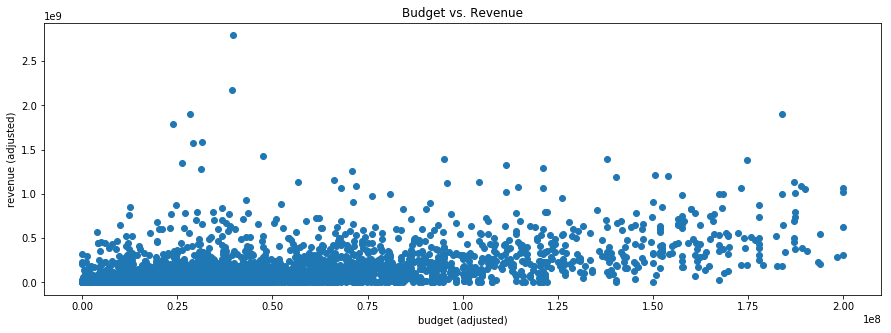

In [197]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(budget2, revenue2)
plt.xlabel('budget (adjusted)')
plt.ylabel('revenue (adjusted)')
plt.title('Budget vs. Revenue');

The above chart shows that budget and revenue have positive correlation.

#### Step 2.1: Analyze the correlation between <font color='red'>director</font> and <font color='red'>revenue</font> (`qualified` analysis).

In [47]:
# create a dictionary including all directors' names:
director_list = {}

for i in df_clean.director:
    for dir in i.split('|'):
        director_list[dir] = {'revenue': []}

In [414]:
# group the director's movie w.r.t to revenue and popularity
for i in df_clean.index:
    for dir in df_clean['director'].loc[i].split('|'):
        director_list[dir]['revenue'].append(df_clean['revenue_adj'].loc[i])

In [415]:
for i in director_list.keys():
    director_list[i]['revenue'] = round(sum(director_list[i]['revenue']),0)

- Find out the <font color='red'>top-10 directors</font> that have the high revenue.

In [416]:
list_revenue = {}

for i in director_list.keys():
    list_revenue[i] = director_list[i]['revenue']

In [417]:
# sort the revenue list.
sorted_list_revenue = sorted((v,k) for k,v in list_revenue.items())
sorted_list_revenue = sorted(sorted_list_revenue, reverse=True)[0:10]

list_revenue = {}

for i in sorted_list_revenue:
    list_revenue[i[1]] = i[0]

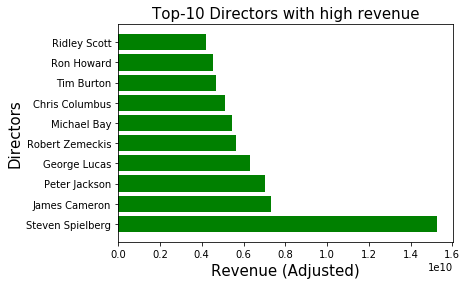

In [421]:
# visualize the rank of the top-10 directors
x = list_revenue.keys()
x_pos = [i for i, _ in enumerate(x)] # calculate the numerical value for each key.
y_pos = [i for i in list_revenue.values()]

plt.barh(x_pos, y_pos, color='green')
plt.ylabel("Directors", fontsize=15)
plt.xlabel("Revenue (Adjusted)", fontsize=15)
plt.title("Top-10 Directors with high revenue", fontsize=15)

plt.yticks(x_pos, x)

plt.show()

#### Step 2.2: Analyze the correlation between <font color='red'>casts</font> and <font color='red'>revenue</font> (`qualified` analysis)

In [425]:
# create a list including all casts' names:
cast_list = {}

for i in df_clean.cast:
    for cast in i.split('|'):
        cast_list[cast] = []

In [428]:
# group the director's movie w.r.t to revenue and popularity
for i in df_clean.index:
    for cast in df_clean['cast'].loc[i].split('|'):
        cast_list[cast].append(df_clean['revenue_adj'].loc[i])

In [430]:
for i in cast_list.keys():
    cast_list[i] = round(sum(cast_list[i]),0)

In [436]:
# sort the top-10 cast with high revenue:
sorted_list_revenue = sorted((v,k) for k,v in cast_list.items())
sorted_list_revenue = sorted(sorted_list_revenue, reverse=True)[0:10]

cast_list = {}

for i in sorted_list_revenue:
    cast_list[i[1]] = i[0]

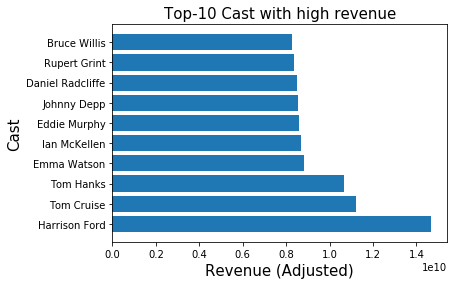

In [440]:
# visualize the correlation between revenue and casts:
x = cast_list.keys()
x_pos = [i for i, _ in enumerate(x)] # calculate the numerical value for each key.
y_pos = [i for i in cast_list.values()]

plt.barh(x_pos, y_pos)
plt.ylabel("Cast", fontsize=15)
plt.xlabel("Revenue (Adjusted)", fontsize=15)
plt.title("Top-10 Cast with high revenue", fontsize=15)

plt.yticks(x_pos, x)

plt.show()

<a id='conclusions'></a>
## Conclusions

### Which genres are most popular from year to year?

Based on the dataset, I found that three genres, i.e., Comedy, Thriller, and Drama, are very popular. Especially, **Drama** is the most popular genre from year to year.

### What kinds of properties are associated with movies that have high revenues?

To answer this question, I examed the dataset using two methods, i.e., quantitative method and qualitative method.

- Based on the **quantitative method**, three metrics (**popularity**, **vote_average**, and **budget_adj**) are highly related to `revenue`.
- Based on the **qualitative method**, **directors** and **casts** are highly related to `revenue`. 

- To better understand the qualitative results, I found that **Steven Spielberg** is the most popular director who is related to the highest movie revenue. In addition, **Harrison Ford** is the most popular cast who is related to the highest revenue.

### Limitations

The data of budget_adj have a lot of `zeros` and the data of popularity have a lot of `outliers`. These two limitations prohibit us to explore the true relationship between these two metrics and the revenue.